In [1]:
#STEP 1 : ‘Load csv data into our dataframes’
import pandas as pd
df = pd.read_csv('uci-news-aggregator.csv')
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [2]:
#STEP 2 : ‘Cleaning the data’
#2a
# — b : business — t : science and technology — e : entertainment — m : health
category_name = pd.DataFrame({'id' : ['b','t','e','m'],
'cat_name' : ['business','science and technology', 'entertainment', 'health']})
df = df[['TITLE', 'CATEGORY']]
df = pd.merge(df,category_name,left_on = "CATEGORY",right_on = "id")[['TITLE','cat_name']]
df.head()

,TITLE,cat_name
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business


<AxesSubplot: xlabel='cat_name'>

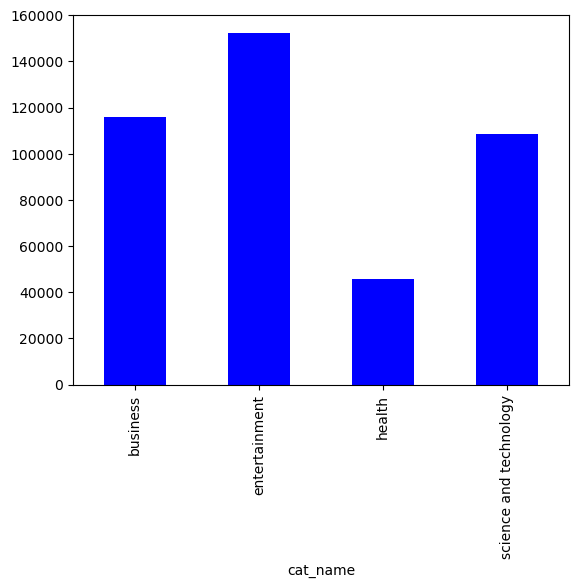

In [3]:
#2b. Observe the data distribution
df.groupby('cat_name').TITLE.count().plot.bar(color = 'blue')

In [4]:
#2c. Remove empty data and useless punctuation
import re
def remove_punc(sentence) :
    sentence = sentence.lower()
    sentence = re.sub('[^a-z]+', '' , sentence)
    return sentence
df.head()

,TITLE,cat_name
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business


In [5]:
#2d. Remove stop words that are not needed in our news title
from nltk.corpus import stopwords
sw = stopwords.words('English')
def stop_word(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in sw:
            new_sentence.append(word)
            return(''.join(new_sentence))
        df['TITLE'] = df['TITLE'].apply(stop_word)
df.head(10)

,TITLE,cat_name
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business
5,Plosser: Fed May Have to Accelerate Tapering Pace,business
6,Fed's Plosser: Taper pace may be too slow,business
7,Fed's Plosser expects US unemployment to fall ...,business
8,US jobs growth last month hit by weather:Fed P...,business
9,ECB unlikely to end sterilisation of SMP purch...,business


In [6]:
#2e. Stem the words, using NLTK SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
def stem(sentence):
    new_sentence = []
    for word in sentence.split():
        word = stemmer.stem(word)
        new_sentence.append(word)
        return(''.join(new_sentence))
    df['TITLE'] = df['TITLE'].apply(stem)
df.head(10)

,TITLE,cat_name
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business
5,Plosser: Fed May Have to Accelerate Tapering Pace,business
6,Fed's Plosser: Taper pace may be too slow,business
7,Fed's Plosser expects US unemployment to fall ...,business
8,US jobs growth last month hit by weather:Fed P...,business
9,ECB unlikely to end sterilisation of SMP purch...,business


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    new_sentence = []
    for word in sentence.split():
        word = lemmatizer.lemmatize(word)
        new_sentence.append(word)
        return(''.join(new_sentence))
    df['TITLE'] = df['TITLE'].apply(lemmatize)
df.head(10)

,TITLE,cat_name
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business
5,Plosser: Fed May Have to Accelerate Tapering Pace,business
6,Fed's Plosser: Taper pace may be too slow,business
7,Fed's Plosser expects US unemployment to fall ...,business
8,US jobs growth last month hit by weather:Fed P...,business
9,ECB unlikely to end sterilisation of SMP purch...,business


In [8]:
#STEP 3 : ‘Feature Extraction’
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
tfidf_features = Tfidf.fit_transform(df.TITLE)
tfidf_features.shape

(422419, 132991)

In [9]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5
Number = 1
for category in df['cat_name'].unique():
    features_chi2 = chi2(tfidf_features, df['cat_name'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(Tfidf.get_feature_names())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    print("{}. {} :".format(Number,category))
    print("\t# Unigrams :\n\t. {}".format('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. {}".format('\n\t. '.join(bigrams[-N:])))
    Number += 1

C:\Users\use-rc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1. business :
	# Unigrams :
	. fed
	. oil
	. china
	. bank
	. stocks
	# Bigrams :
	. in march
	. home sales
	. bank of
	. wall street
	. us stocks


C:\Users\use-rc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2. science and technology :
	# Unigrams :
	. facebook
	. microsoft
	. samsung
	. apple
	. google
	# Bigrams :
	. climate change
	. xbox one
	. google glass
	. galaxy s5
	. samsung galaxy


C:\Users\use-rc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


3. entertainment :
	# Unigrams :
	. thrones
	. movie
	. season
	. kim
	. kardashian
	# Bigrams :
	. kanye west
	. miley cyrus
	. game of
	. of thrones
	. kim kardashian


C:\Users\use-rc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4. health :
	# Unigrams :
	. virus
	. study
	. mers
	. cancer
	. ebola
	# Bigrams :
	. ebola virus
	. linked to
	. west africa
	. west nile
	. ebola outbreak


In [10]:
#STEP 4 : ‘Feed features into Machine Learning Algorithm’
#1.Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
DTClass = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['cat_name'], test_size = 1/5, random_state = 50)
DTClass.fit(X_train,y_train)
prediction = DTClass.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy score:")
print(accuracy_score(y_test, prediction))

accuracy score:
0.8755740731972917


In [ ]:
#2.Linear Support Vector Classification
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
svc = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['cat_name'], test_size = 1/5, random_state = 50)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, prediction))

In [ ]:
#3.Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RFClass = RandomForestClassifier(n_estimators=500, criterion="gini", random_state=77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['cat_name'], test_size = 1/5, random_state = 50)
RFClass.fit(X_train,y_train)
prediction = RFClass.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, prediction))

In [ ]:
#4.Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['cat_id'], test_size = 1/5, random_state = 50)
SGDC.fit(X_train, y_train)
prediction = SGDC.predict(X_test)
print("accuracy score:")
print(accuracy_score(y_test, prediction))